### NOTEARS Analysis: Robustness to datatypes

Given that the paper mainly conducted their evaluation on measurements (continuous data), we seek to evaluate the algorithm further 

As the paper mentioned, the problem formulation should be agnostic to the form of data used. It suggests that the model should not make assumptions about the datatype. However, the paper's experiments did not include evaluation of robustness / sensitivity analysis against types of data for the structural discovery task.

Hence, we seek to test the sensitivity of NOTEARS towards different datatypes when learning the weighted adjacency matrix representing a  directed graph. (i.e. learning the graph from categorical data vs binary data)

To test this statement, we will conduct the following experiments: 

- learning the graph from (ordinal) categorical data vs binary data


### Load data

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('../data/student/student-por.csv', delimiter=';')
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,2,0,yes,no,...,4,3,4,1,1,3,4,0,11,11
1,U,GT3,T,1,1,1,2,0,no,yes,...,5,3,3,1,1,3,2,9,11,11
2,U,LE3,T,1,1,1,2,0,yes,no,...,4,3,2,2,3,3,6,12,13,12
3,U,GT3,T,4,2,1,3,0,no,yes,...,3,2,2,1,1,5,0,14,14,14
4,U,GT3,T,3,3,1,2,0,no,yes,...,4,3,2,1,2,5,0,11,13,13


In [8]:
from sklearn.preprocessing import LabelEncoder

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,1,1,1,2,0,0,1,...,5,3,3,1,1,3,2,9,11,11
2,1,1,1,1,1,1,2,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,4,2,1,3,0,0,1,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,3,3,1,2,0,0,1,...,4,3,2,1,2,5,0,11,13,13


## Cat -> Binary

### Categorical Data

In [13]:
## take all the datatype of the same scale (0-5)
## nomimal 

# data_bin = 
ord_cat_data = ['Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']

# 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)

# 31 G1 - first period grade (numeric: from 0 to 20): [0-5, ]
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)


In [11]:
def map_data(x):
    if x >=0 and x< 3:
        return 1
    elif x>=4 and x<8:
        return 2
    elif x>=8 and x<12: 
        return 3
    elif x>=12 and x<16: 
        return 4
    elif x>=16:
        return 5

In [14]:
data[ord_cat_data]

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
0,4,4,4,3,4,1,1,3,0,11,11
1,1,1,5,3,3,1,1,3,9,11,11
2,1,1,4,3,2,2,3,3,12,13,12
3,4,2,3,2,2,1,1,5,14,14,14
4,3,3,4,3,2,1,2,5,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,5,4,2,1,2,5,10,11,10
645,3,1,4,3,4,1,1,1,15,15,16
646,1,1,1,1,1,1,1,5,11,12,9
647,3,1,2,4,5,3,4,2,10,10,10


In [15]:
data[ord_cat_data].describe()

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.306626,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,11.399076,11.570108,11.906009
std,1.134552,1.099931,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,2.745265,2.913639,3.230656
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,10.000000,10.000000,10.000000
50%,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,12.000000
75%,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000,19.000000


In [16]:
data_map = {
    0:1, 1:2, 2:3, 3:4, 4:5
}
nom_cat_data_df = data[ord_cat_data]
nom_cat_data_df['Medu'] = nom_cat_data_df['Medu'].map(data_map)
nom_cat_data_df['Fedu'] = nom_cat_data_df['Fedu'].map(data_map)
nom_cat_data_df['G1'] = nom_cat_data_df['G1'].map(map_data)
nom_cat_data_df.drop(['G2', 'G3'], axis=1, inplace=True)
nom_cat_data_df.describe()


/var/folders/z2/338wc_l91cb7482t8gghnrxc0000gn/T/ipykernel_62030/2961648195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nom_cat_data_df['Medu'] = nom_cat_data_df['Medu'].map(data_map)
/var/folders/z2/338wc_l91cb7482t8gghnrxc0000gn/T/ipykernel_62030/2961648195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nom_cat_data_df['Fedu'] = nom_cat_data_df['Fedu'].map(data_map)
/var/folders/z2/338wc_l91cb7482t8gghnrxc0000gn/T/ipykernel_62030/2961648195.py:7: SettingWithCopyWarning: 
A value is trying to 

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,3.514638,3.306626,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.463790
std,1.134552,1.099931,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,0.742659
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
nom_cat_data_df

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
0,5,5,4,3,4,1,1,3,1
1,2,2,5,3,3,1,1,3,3
2,2,2,4,3,2,2,3,3,4
3,5,3,3,2,2,1,1,5,4
4,4,4,4,3,2,1,2,5,3
...,...,...,...,...,...,...,...,...,...
644,3,4,5,4,2,1,2,5,3
645,4,2,4,3,4,1,1,1,4
646,2,2,1,1,1,1,1,5,3
647,4,2,2,4,5,3,4,2,3


In [93]:
#### To learn causal graph from nominal categorical data 
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import random

# Set the random seed for numpy
np.random.seed(50)
# Set the random seed for Python's built-in random module
random.seed(50)

sm = from_pandas(nom_cat_data_df)

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(False)
viz.show("graph_viz/nom_cat_data.html")


In [95]:
for node in sm.adjacency(): 
    print(node)

## transform 

('Medu', {'Fedu': {'origin': 'learned', 'weight': 1.6911382295183413e-06}, 'famrel': {'origin': 'learned', 'weight': 0.08188721796671379}, 'freetime': {'origin': 'learned', 'weight': 3.546701797754018e-05}, 'goout': {'origin': 'learned', 'weight': 9.624293280997623e-06}, 'Dalc': {'origin': 'learned', 'weight': 0.0001941583159864375}, 'Walc': {'origin': 'learned', 'weight': 5.36291372242792e-05}, 'health': {'origin': 'learned', 'weight': 2.2854562482295674e-05}, 'G1': {'origin': 'learned', 'weight': 0.3211351680709189}})
('Fedu', {'Medu': {'origin': 'learned', 'weight': 0.8086639448294071}, 'famrel': {'origin': 'learned', 'weight': 0.04804115222530964}, 'freetime': {'origin': 'learned', 'weight': 1.2191924401560561e-05}, 'goout': {'origin': 'learned', 'weight': 3.6841857339031815e-06}, 'Dalc': {'origin': 'learned', 'weight': 6.748637287294813e-05}, 'Walc': {'origin': 'learned', 'weight': 1.789323032016848e-05}, 'health': {'origin': 'learned', 'weight': 8.049527375354165e-06}, 'G1': {'or

In [76]:
sm.get_edge_data('G1', 'Medu')
# {'origin': 'learned', 'weight': 2.028398417279545e-06}
sm.get_edge_data('Medu', 'G1')
# {'origin': 'learned', 'weight': 0.3211351680709189}

# yes algorithm learns both directions; 
# and uses threshold to filter out the values; 


{'origin': 'learned', 'weight': 2.028398417279545e-06}

In [79]:
sm.get_edge_data('Fedu', 'Medu')
# {'origin': 'learned', 'weight': 0.8086639448294071}
sm.get_edge_data('Medu', 'Fedu')
# {'origin': 'learned', 'weight': 1.6911382295183413e-06}

{'origin': 'learned', 'weight': 1.6911382295183413e-06}

In [82]:
sm.remove_edges_below_threshold(0.4)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(0)
viz.show("graph_viz/nom_cat_thresholded.html")

graph_viz/nom_cat_thresholded.html


### Binary Data

In [20]:
## change to binary
def bin_map(x): 
    if x >= 0 and x < 3: 
        return 0
    if x >= 3: 
        return 1

In [21]:
bin_nom_cat_data_df = nom_cat_data_df.applymap(bin_map)
bin_nom_cat_data_df.head()

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
0,1,1,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,1,1
2,0,0,1,1,0,0,1,1,1
3,1,1,1,0,0,0,0,1,1
4,1,1,1,1,0,0,0,1,1


In [96]:
#### To learn causal graph from nominal categorical data 
from causalnex.structure.notears import from_pandas
import random

# Set the random seed for numpy
np.random.seed(42)

# Set the random seed for Python's built-in random module
random.seed(42)

sm = from_pandas(bin_nom_cat_data_df)


In [99]:
for node in sm.adjacency(): 
    print(node)

('Medu', {'Fedu': {'origin': 'learned', 'weight': 0.7015284945020264}, 'famrel': {'origin': 'learned', 'weight': 0.12577358914272121}, 'freetime': {'origin': 'learned', 'weight': 0.009753917043003045}, 'goout': {'origin': 'learned', 'weight': 5.71256916432792e-06}, 'Dalc': {'origin': 'learned', 'weight': 1.2135886682478552e-05}, 'Walc': {'origin': 'learned', 'weight': 1.0225133652302265e-05}, 'health': {'origin': 'learned', 'weight': 0.03222825764982956}, 'G1': {'origin': 'learned', 'weight': 0.43530288635843334}})
('Fedu', {'Medu': {'origin': 'learned', 'weight': 4.514877040444832e-06}, 'famrel': {'origin': 'learned', 'weight': 0.07134896604526003}, 'freetime': {'origin': 'learned', 'weight': 0.06027866590683115}, 'goout': {'origin': 'learned', 'weight': 1.721652913813937e-05}, 'Dalc': {'origin': 'learned', 'weight': 5.181921406940116e-05}, 'Walc': {'origin': 'learned', 'weight': 3.9608745572809956e-05}, 'health': {'origin': 'learned', 'weight': 0.046383275541905813}, 'G1': {'origin':

In [100]:
sm.remove_edges_below_threshold(0.4)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(False)
viz.show("graph_viz/0.4_bin_nom_cat.html")

graph_viz/bin_nom_cat.html


In [23]:
nom_cat_data_df

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
0,5,5,4,3,4,1,1,3,1
1,2,2,5,3,3,1,1,3,3
2,2,2,4,3,2,2,3,3,4
3,5,3,3,2,2,1,1,5,4
4,4,4,4,3,2,1,2,5,3
...,...,...,...,...,...,...,...,...,...
644,3,4,5,4,2,1,2,5,3
645,4,2,4,3,4,1,1,1,4
646,2,2,1,1,1,1,1,5,3
647,4,2,2,4,5,3,4,2,3


## Traditional approach

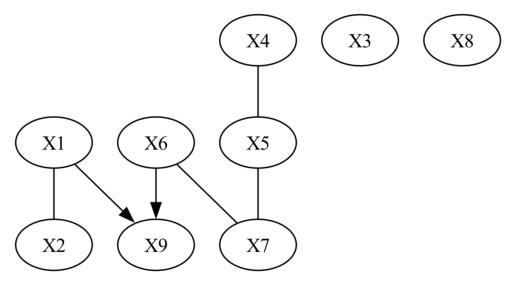

In [26]:

from causallearn.search.ScoreBased.GES import ges
X = nom_cat_data_df
score_func = "local_score_BIC"
# default parameters
Record = ges(X)

# or customized parameters
Record = ges(X, score_func, maxP=None, parameters=None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

In [25]:
bin_nom_cat_data_df.head()

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
0,1,1,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,1,1
2,0,0,1,1,0,0,1,1,1
3,1,1,1,0,0,0,0,1,1
4,1,1,1,1,0,0,0,1,1


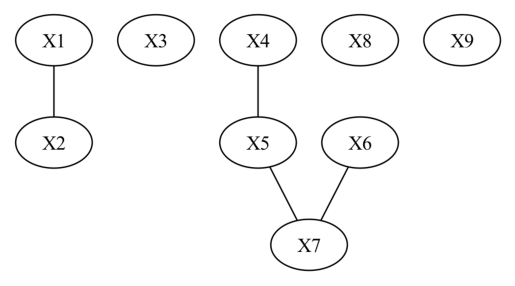

In [24]:
## traditional method

from causallearn.search.ScoreBased.GES import ges
X = bin_nom_cat_data_df
score_func = "local_score_BIC"
# default parameters
Record = ges(X)

# or customized parameters
Record = ges(X, score_func, maxP=None, parameters=None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,G1
0,1,1,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,1,1
2,0,0,1,1,0,0,1,1,1
3,1,1,1,0,0,0,0,1,1
4,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
644,1,1,1,1,0,0,0,1,1
645,1,0,1,1,1,0,0,0,1
646,0,0,0,0,0,0,0,1,1
647,1,0,0,1,1,1,1,0,1
